# Sound Sound Go Away! 

#### In this experiment, we are testing whether or not there is an effect of decreased background noise on the reaction time of special needs children suffering from Hyperacusis. We hypothesize that if background noise is reduced for children with special needs suffering from Hyperacusis (extreme sensitivity to sound), then their reaction time to games played on a tablet will be reduced. 
#### To test whether or not the hypothesis was not exclusive to the experiment and the sample selected, we ran A/B Hypothesis testing to ensure that the results from samples of subjects with and without Hypercausis came from the same underlying distribution.

*Loading python libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

### Step 1: Loading Data

In [2]:
experiment = pd.read_csv('experiment.csv')[:-1]
experiment

,With or Without,Background Noise at a maximum 60 dBs (Control),"Background Noise Reduced by 30%, 42 dBs","Background Noise Reduced by 60%, 24 dBs",Background Noise Eliminated
0,Without,0.365,0.413,0.341,0.338
1,Without,0.360,0.323,0.361,0.320
2,Without,0.399,0.359,0.409,0.390
3,Without,0.468,0.396,0.427,0.375
4,Without,0.428,0.414,0.405,0.410
5,Without,0.403,0.466,0.432,0.415
6,Without,0.410,0.428,0.373,0.423
7,Without,0.438,0.409,0.374,0.392
8,Without,0.381,0.363,0.383,0.362
9,Without,0.440,0.395,0.408,0.408


### Step 2: Find the difference in results compared to the control group and output new table.

In [3]:
testing = pd.DataFrame()
testing['With or Without'] = experiment['With or Without']
testing['Background Noise Reduced by 30%, 42 dBs'] = experiment['Background Noise Reduced by 30%, 42 dBs'] - experiment['Background Noise at a maximum 60 dBs (Control)']
testing['Background Noise Reduced by 60%, 24 dBs'] = experiment['Background Noise Reduced by 60%, 24 dBs'] - experiment['Background Noise at a maximum 60 dBs (Control)']
testing['Background Noise Eliminated'] = experiment['Background Noise Eliminated'] - experiment['Background Noise at a maximum 60 dBs (Control)']
testing

,With or Without,"Background Noise Reduced by 30%, 42 dBs","Background Noise Reduced by 60%, 24 dBs",Background Noise Eliminated
0,Without,0.048,-0.024,-0.027
1,Without,-0.037,0.001,-0.040
2,Without,-0.040,0.010,-0.009
3,Without,-0.072,-0.041,-0.093
4,Without,-0.014,-0.023,-0.018
5,Without,0.063,0.029,0.012
6,Without,0.018,-0.037,0.013
7,Without,-0.029,-0.064,-0.046
8,Without,-0.018,0.002,-0.019
9,Without,-0.045,-0.032,-0.032


### Step 3: Exploratory Data Analyis: 
##### The cell below simply finds the average difference in reaction times when the background noise is completely eliminated for the subjects with and without Hyperacusis.


In [4]:
wout = testing[testing['With or Without'] == 'Without']
w = testing[testing['With or Without'] == 'With']
mean_with = w['Background Noise Eliminated'].mean()
mean_without = wout['Background Noise Eliminated'].mean()
print('Mean difference in reaction time for children with Hyperacusis: ' + str(mean_with)) 
print('Mean difference reaction time for children without Hyperacusis: ' + str(mean_without))
print('Average difference between groups: ' + str(mean_with - mean_without))

Mean difference in reaction time for children with Hyperacusis: -0.1437
Mean difference reaction time for children without Hyperacusis: -0.025899999999999986
Average difference between groups: -0.11780000000000002


##### The cell below plots the distribution of the observed difference in reaction time when the background noise is reduced by 30%, 60%, and 100% (respectively). This is also aggregated such that the Orange distribution is that of subjects without Hyperacusis, whereas the Blue distribution is that of subjects without Hyperacusis.

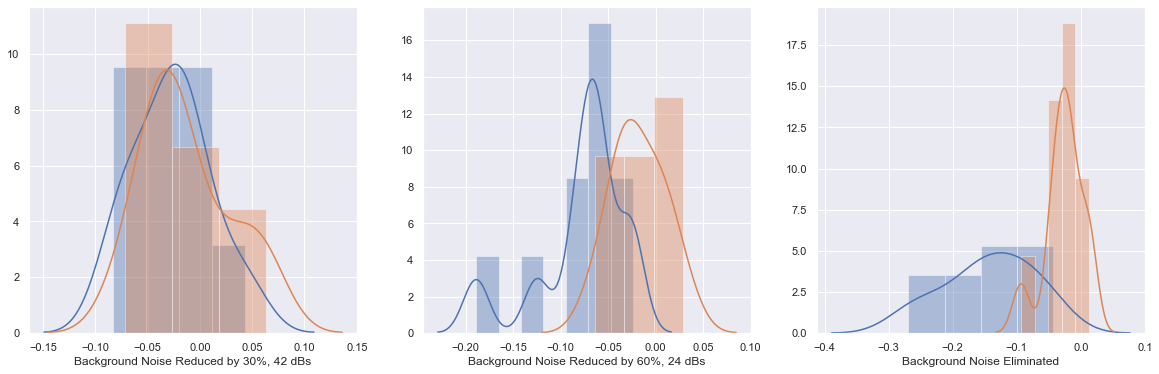

In [12]:
fig = plt.figure(figsize=(20, 6))

for i in np.arange(1,4):
    plt.subplot(1,3,i)
    sns.distplot(w[testing.columns[i]])
    sns.distplot(wout[testing.columns[i]])

##### This cell is simply outputting the average difference in reaction speed compared to the control in table form.

In [6]:
avgs = testing.groupby(['With or Without']).mean()
avgs

,"Background Noise Reduced by 30%, 42 dBs","Background Noise Reduced by 60%, 24 dBs",Background Noise Eliminated
With or Without,,,
With,-0.0269,-0.0777,-0.1437
Without,-0.0126,-0.0179,-0.0259


##### This cell is simply outputting the differences in the averages shown above in the table. For instance, when the background noise was eliminated, the children with Hyperacucis had an, on average, 0.11 faster reaction time compared to those without Hyperacusis.

In [7]:
print('Observed differences in Reaction Time for children without Hyperacusis vs children with Hyperacusis in seconds: ')
observed_difference = avgs.iloc[0] - avgs.iloc[1]
observed_difference

Observed differences in Reaction Time for children without Hyperacusis vs children with Hyperacusis in seconds: 


Background Noise Reduced by 30%, 42 dBs   -0.0143
Background Noise Reduced by 60%, 24 dBs   -0.0598
Background Noise Eliminated               -0.1178
dtype: float64

### Step 4: A/B Testing Algorithm: 
##### To begin we have to state the Null Hypothesis we wish to disprove:

###### If background noise is reduced for children with special needs suffering from Hyperacusis (extreme sensitivity to sound), then their reaction time to games played on a tablet will not be affected.

#### To see how the statistic should vary under the null hypothesis, we have to figure out how to simulate the statistic under that hypothesis. A clever method based on random permutations does just that.

#### If there were no difference between the two distributions in the underlying population, then whether an observed reaction time belongs to a subject with or without Hyperacusis should make no difference to the average. The idea, then, is to shuffle all the labels randomly among the subjects. This is called random permutation.

#### In the cell below, we have code that would run one simulation of how the results would come out if there subjects were shuffled based on the noise difference results.

In [8]:
testing['shuffled'] = testing['With or Without'].values.tolist()

def one_simulated_difference(noise_level):
    np.random.shuffle(testing['shuffled'].values)
    new_avgs  = testing.groupby(['shuffled']).mean()
    return (new_avgs.iloc[0] - new_avgs.iloc[1])[noise_level]

#### In the two cells below, we repeat that simulation 1000 times for each of the observed differences in noise levels. Then we output a graph of the distrubtion of the simulations. 

In [13]:
repetitions = 1000
differences = []

def ABtest(noise_level):
    
    for i in np.arange(repetitions):
        new_difference = one_simulated_difference(noise_level)
        differences.append(new_difference) 
    
    sns.set()
    sns.distplot(differences)
    plt.axvline(x=(avgs.iloc[0] - avgs.iloc[1])[noise_level], linewidth=6,color='r')
    plt.xlabel('Average Difference Between Groups', fontsize=15)
    plt.ylabel('Percent per unit', fontsize=15)
    plt.title(noise_level, fontsize=15);

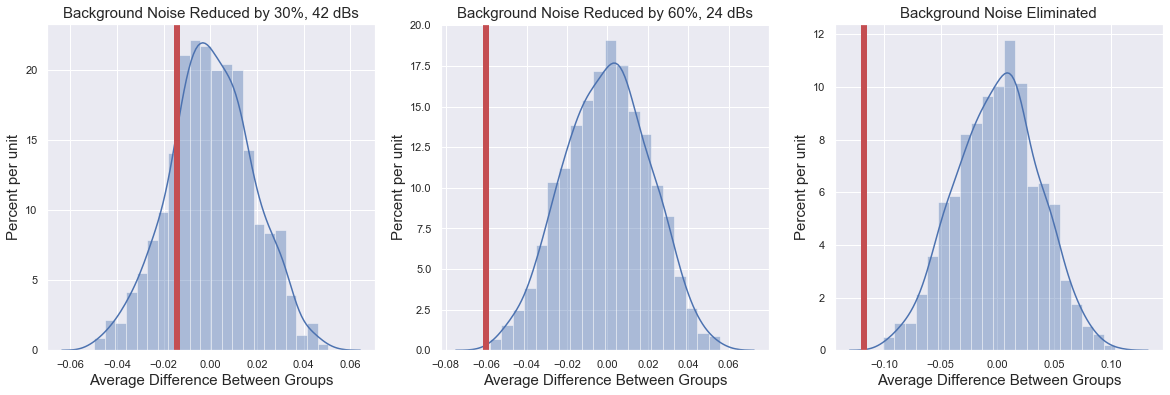

In [14]:
fig = plt.figure(figsize=(20, 6))
p_values = []

for i in np.arange(1,4):
    plt.subplot(1,3,i)
    ABtest(testing.columns[i])
    p_values.append(np.count_nonzero(differences <= observed_difference[i-1]) / repetitions)

    differences = []

#### In the graphs above, we have the distribution of the 1000 simulations for each experiment (Noise reduced by 30, 60, and 100%). The vertical red line indicates the actual difference in reaction time that we got in our real life experiment!

#### Notice how the distributions are centered around 0. This makes sense, because under the null hypothesis the two groups should have roughly the same average. Therefore the difference between the group averages should be around 0.

#### In the cell below, we compute p-values for each experiment to see whether or not we can conclusively say we can reject the null hypothesis.

In [15]:
for i in np.arange(0,3):
    print("P-value when " + testing.columns[i+1] + ":     " + str(p_values[i]))

P-value when Background Noise Reduced by 30%, 42 dBs:     0.198
P-value when Background Noise Reduced by 60%, 24 dBs:     0.0
P-value when Background Noise Eliminated:     0.0


#### When testing reaction times when the noise is reduced by 30%, the observed difference in the original experiment is about  -0.0143 seconds, which is in the distribution of the simulations. In fact, when we compute a p-value for our result compared to the distributions, we get 19.8%, so we can not conclusively eliminate the null hypothesis (That the reaction time is not impacted by reduced background noise) in the case of a 30% reduction.

#### On the other hand, when reduced by 60 and 100%, we get p-values of 0. The observed experimental values and the predicted behavior of the statistic (based on the generated simulations) under the null hypothesis are inconsistent. The conclusion of the test is that the data favor the alternative over the null. Therefore, we can conclusively reject the null hypotheses in these cases and say that our hypothesis is correct!

#### One disclaimer however is that our sample size of 20 subjects is relatively small, so these results may be subject to change with larger sample sizes.